In [1]:
import sys, os
import pandas as pd

In [2]:
### OK for 2006-2020

def read_income_xlsx(with_name, sheet='総', nrow= 133, column_range = "AE:CF"):
    df = pd.read_excel(with_name, sheet, skiprows=10, nrows = nrow, usecols=column_range)
    year = int(with_name.split("/")[-1][:4])

    columns = df.columns.tolist()

    column_content = {}

    for _, row in df.loc[[2]].iterrows():
        for c in columns:
            if isinstance(row[c], str):
                if c not in column_content:
                    column_content[c] = row[c]

    city_names = []

    for _, row in df.loc[[3]].iterrows():
        for c in columns:
            if isinstance(row[c], str):
                city_name = row[c]
                if c in column_content:
                    city_name = column_content[c].strip() + " " + row[c].strip()
                city_names.append(city_name)

    df = df.iloc[4:]



    df.set_index(df.columns[-1], inplace = True)
    df.index.names = ["variable"]

    df = df.iloc[:, :-1]

    df.columns = city_names

    df["year"] = year

    return pd.melt(df.reset_index(), id_vars=['variable', 'year'],value_vars=city_names, var_name="city")




In [3]:
file_name = "./income_monthly_average/2013 Yearly Average Survey Results.xls"
#2017 early AJ:CI, 145
#2012 early AJ:CJ, 145
#2009 early AJ:CJ, 144
#2006 early "全"
temp = read_income_xlsx(file_name, "総", 145, "AJ:CK")
temp

,variable,year,city,value
0,Distribution of households,2013,Sapporo-shi,172
1,Num. of tabulated households,2013,Sapporo-shi,106
2,Num. of persons per household (persons),2013,Sapporo-shi,2.18
3,Num. of earners per household (persons),2013,Sapporo-shi,1
4,Age of household heads (years old),2013,Sapporo-shi,55.8
...,...,...,...,...
7327,Transportation & communication,2013,Kitakyushu- shi,45
7328,Education,2013,Kitakyushu- shi,0
7329,Culture & recreation,2013,Kitakyushu- shi,430
7330,Other consumption expenditures,2013,Kitakyushu- shi,69


In [4]:
top_folder = "/Users/dgg32/Downloads/Japan_stats/income_monthly_average/"
extension = ".xls"

file_name = "./income_monthly_average/2020 Yearly Average Survey Results.xls"

df = read_income_xlsx(file_name)

for (head, dirs, files) in os.walk(top_folder):
    for file in files:
        if file.endswith(extension):
            current_file_path = os.path.abspath(os.path.dirname(os.path.join(head, file)))
            with_name = current_file_path + "/"+ file
            #file_name = "./income_monthly_average/2020 Yearly Average Survey Results.xls"
            year = int(with_name.split("/")[-1][:4])
            #print (year)
                
            if year < 2020 and year > 2005:
                print (year)
                column_range = "AE:CF"
                nrow= 133
                sheet = "総"

                if year <= 2017 and year > 2012:
                    #2017 early AJ:CI, 145
                    column_range = "AJ:CK"
                    nrow = 145
                elif year <= 2012 and year > 2009:
                    #2012 early AJ:CJ, 145
                    column_range = "AJ:CJ"
                elif year <= 2009 and year > 2006:
                    #2009 early AJ:CJ, 144
                    column_range = "AJ:CJ"
                    nrow = 144
                elif year == 2006:
                    sheet = "全"
                    column_range = "AJ:CJ"
                    nrow = 144

                
                temp = read_income_xlsx(with_name, sheet, nrow, column_range)
                df = pd.concat([df, temp])

2012
2010
2013
2011
2017
2006
2015
2009
2018
2007
2016
2014
2019
2008


In [5]:
df

,variable,year,city,value
0,Distribution of households,2020,Sapporo-shi,170
1,Num. of tabulated households,2020,Sapporo-shi,106
2,Num. of persons per household (persons),2020,Sapporo-shi,2.05
3,Num. of earners per household (persons),2020,Sapporo-shi,0.95
4,Age of household heads (years old),2020,Sapporo-shi,57.3
...,...,...,...,...
7135,Transportation & communication,2008,Kitakyushu- shi,58
7136,Education,2008,Kitakyushu- shi,0
7137,Culture & recreation,2008,Kitakyushu- shi,469
7138,Other consumption expenditures,2008,Kitakyushu- shi,164


In [6]:
df[(df["city"] == "Okayama-shi") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]]

,year,value
4256,2020,26.8
4652,2013,22.1
4652,2017,25
5039,2006,20.9
4652,2015,25.3
4619,2009,21.5
4256,2018,23.4
5039,2007,21
4652,2016,24.1
4652,2014,23.2


<AxesSubplot:xlabel='year'>

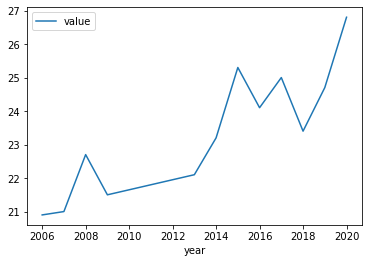

In [7]:
df[(df["city"] == "Okayama-shi") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]].sort_values("year").plot(x="year", y="value")

<AxesSubplot:xlabel='year'>

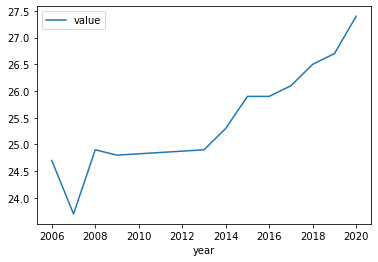

In [8]:
df[(df["city"] == "Ku-areas of Tokyo") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]].sort_values("year").plot(x="year", y="value")

<AxesSubplot:xlabel='year'>

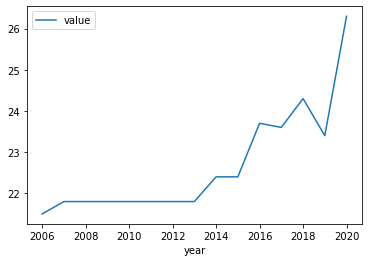

In [9]:
df[(df["city"] == "Nagano-shi") & (df["variable"] == "Engel's coefficient (%)")][["year", "value"]].sort_values("year").plot(x="year", y="value")